In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import hvplot.pandas

In [74]:
# Load the CSV file for the school number in each state into a Pandas DataFrame
import pandas as pd
school_df= pd.read_csv("dataset/school.csv", delimiter=',', header=None, skiprows=1, names=['State or jurisdiction','Number of operational schools 1',' Number of operational districts','Unnamed: 3',
                                                                                        ' Membership2','Teacher2','Unnamed: 6','Pupil/ Teacher Ratio','Z'])
#create a mashine to be able to work with a csv has a speace in the columns title
from sklearn.model_selection import train_test_split
schools_df, test = train_test_split(school_df, test_size = 0.2)
number_schools_df = schools_df[['State or jurisdiction','Number of operational schools 1',' Number of operational districts','Unnamed: 3',
                                                                                    ' Membership2','Teacher2','Unnamed: 6','Pupil/ Teacher Ratio','Z']]

In [80]:
# Load the CSV file for the COVID cases in each state into a Pandas DataFrame
covid_cases_df = pd.read_csv("dataset/us-states.csv")


# Display sample data
covid_cases_df

,date,state,fips,cases,deaths
0,2023-03-24,Tennessee,47,2459152,29035
1,2023-03-24,Michigan,26,3068195,42311
2,2023-03-24,Massachusetts,25,2230150,24441
3,2023-03-24,Maryland,24,1369930,16672
4,2023-03-24,Iowa,19,907421,10770
5,2023-03-24,Maine,23,319997,2981
6,2023-03-24,Texas,48,8447168,94518
7,2023-03-24,Louisiana,22,1580709,18835
8,2023-03-24,Kansas,20,940815,10232
9,2023-03-24,Kentucky,21,1723443,18348


In [96]:
##reduce the columns to tow columns which we need to work on it
covid_cases = covid_cases_df[["state","cases","deaths"]]
covid_cases

,state,cases,deaths
0,Tennessee,2459152,29035
1,Michigan,3068195,42311
2,Massachusetts,2230150,24441
3,Maryland,1369930,16672
4,Iowa,907421,10770
5,Maine,319997,2981
6,Texas,8447168,94518
7,Louisiana,1580709,18835
8,Kansas,940815,10232
9,Kentucky,1723443,18348


In [97]:
# Load the CSV file for the education level in each state into a Pandas DataFrame
education_level_df = pd.read_csv("dataset/education_level.csv")


In [98]:
#organaoze the columns in order to have the state first
education_level_order = education_level_df[["State","RANK"]]

In [99]:
education_level = education_level_order.rename(columns={"State":"state"})
education_level.reset_index()

,index,state,RANK
0,0,New Jersey,1
1,1,New Hampshire,2
2,2,Connecticut,3
3,3,Vermont,4
4,4,Massachusetts,5
5,5,New York,6
6,6,Maine,7
7,7,Colorado,8
8,8,Pennsylvania,9
9,9,Virginia,10


In [100]:
covid_rank = pd.merge(covid_cases, education_level, on="state", how="outer")
covid_rank 

,state,cases,deaths,RANK
0,Tennessee,2459152,29035,41.0
1,Michigan,3068195,42311,29.0
2,Massachusetts,2230150,24441,5.0
3,Maryland,1369930,16672,12.0
4,Iowa,907421,10770,16.0
5,Maine,319997,2981,7.0
6,Texas,8447168,94518,38.0
7,Louisiana,1580709,18835,49.0
8,Kansas,940815,10232,28.0
9,Kentucky,1723443,18348,30.0


In [101]:
COVID_RANK_df = covid_rank.dropna(how="any")
COVID_RANK_df.reset_index()

,index,state,cases,deaths,RANK
0,0,Tennessee,2459152,29035,41.0
1,1,Michigan,3068195,42311,29.0
2,2,Massachusetts,2230150,24441,5.0
3,3,Maryland,1369930,16672,12.0
4,4,Iowa,907421,10770,16.0
5,5,Maine,319997,2981,7.0
6,6,Texas,8447168,94518,38.0
7,7,Louisiana,1580709,18835,49.0
8,8,Kansas,940815,10232,28.0
9,9,Kentucky,1723443,18348,30.0


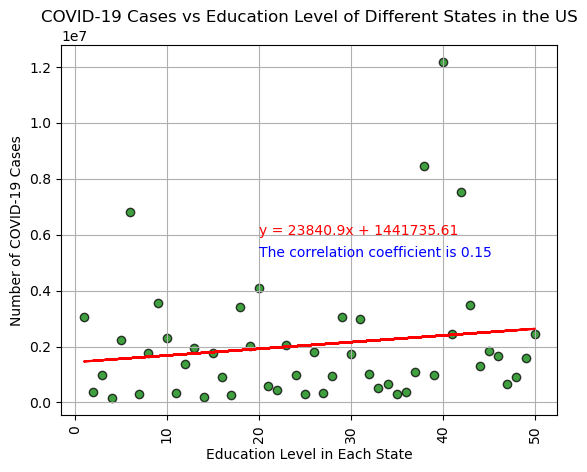

In [193]:
# Build scatter plot for latitude vs. temperature

x_values = COVID_RANK_df["RANK"]
y_values = COVID_RANK_df["cases"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", facecolors="green", edgecolors="black",  
            alpha=0.75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,6000000),fontsize=10,color="red")
plt.annotate(f"The correlation coefficient is {round(rvalue,2)}",(20,5200000),fontsize=10,color="blue")

plt.xticks(rotation=90)
plt.xlabel('Education Level in Each State')
plt.ylabel('Number of COVID-19 Cases')
plt.title("COVID-19 Cases vs Education Level of Different States in the US")
plt.grid()

# Save the figure
plt.savefig("images/COVID_19 vs Education level.png")

# Show plot
plt.show()

In [162]:
COVID_RANK_df["case fatality rate"] = (COVID_RANK_df["deaths"] / COVID_RANK_df["cases"])*100


C:\Users\Fatima\AppData\Local\Temp\ipykernel_2228\2926178131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COVID_RANK_df["case fatality rate"] = (COVID_RANK_df["deaths"] / COVID_RANK_df["cases"])*100


In [163]:
COVID_RANK_df

,state,cases,deaths,RANK,case fatality rate
0,Tennessee,2459152,29035,41.0,1.180692
1,Michigan,3068195,42311,29.0,1.379019
2,Massachusetts,2230150,24441,5.0,1.095935
3,Maryland,1369930,16672,12.0,1.216996
4,Iowa,907421,10770,16.0,1.186880
5,Maine,319997,2981,7.0,0.931571
6,Texas,8447168,94518,38.0,1.118931
7,Louisiana,1580709,18835,49.0,1.191554
8,Kansas,940815,10232,28.0,1.087568
9,Kentucky,1723443,18348,30.0,1.064613


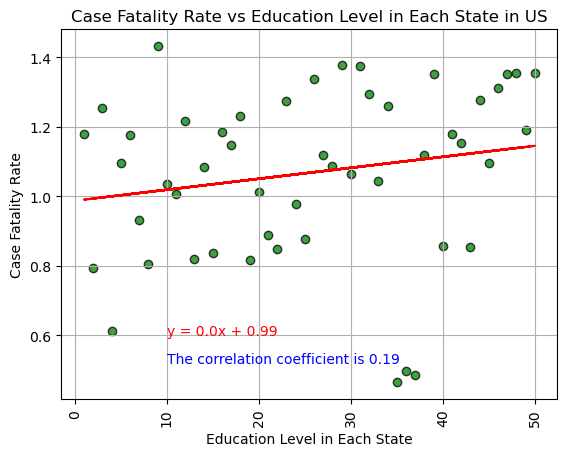

In [194]:
# Build scatter plot for latitude vs. temperature

x_values = COVID_RANK_df["RANK"]
y_values = COVID_RANK_df["case fatality rate"].astype("float")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Incorporate the other graph properties
plt.scatter(x_values, y_values, marker="o", facecolors="green", edgecolors="black",  
            alpha=0.75)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0.6),fontsize=10,color="red")
plt.annotate(f"The correlation coefficient is {round(rvalue,2)}",(10,0.52),fontsize=10,color="blue")

plt.xticks(rotation=90)
plt.xlabel('Education Level in Each State')
plt.ylabel('Case Fatality Rate')
plt.title("Case Fatality Rate vs Education Level in Each State in US")
plt.grid()

# Save the figure
plt.savefig("images/Fatality rate vs Rank.png")

# Show plot
plt.show()

In [165]:
#top 5 rank state
Sorted_COVID_df = COVID_RANK_df.sort_values("RANK")
bottom_five = Sorted_COVID_df.head(5)
bottom_five

,state,cases,deaths,RANK,case fatality rate
22,New Jersey,3057442,36097,1.0,1.180627
24,New Hampshire,379689,3018,2.0,0.794861
16,Connecticut,978456,12270,3.0,1.254017
52,Vermont,153198,939,4.0,0.612932
2,Massachusetts,2230150,24441,5.0,1.095935


In [166]:
top_five = Sorted_COVID_df.tail(5)
top_five

,state,cases,deaths,RANK,case fatality rate
41,Alabama,1648385,21631,46.0,1.312254
21,New Mexico,673541,9110,47.0,1.352553
26,Nevada,892814,12093,48.0,1.354481
7,Louisiana,1580709,18835,49.0,1.191554
28,Arizona,2451062,33190,50.0,1.354107


In [182]:
# Create an array that contains the number of users each language has

bottom_fatality_rate = bottom_five["case fatality rate"]
x_axis = np.arange(len(top_fatality_rate))
bar_labels = ["purple","pink","yellowgreen","lightskyblue","lightcoral"]
bar_colors = ['r', 'b', 'm', 'c', 'y']


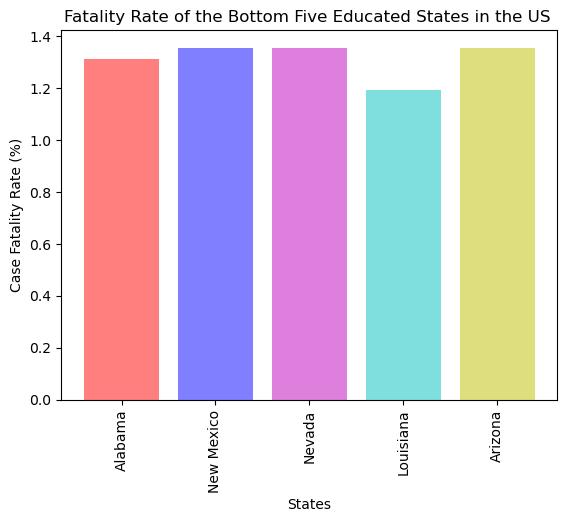

In [183]:
tick_locations = [value for value in x_axis]
plt.bar(x_axis,top_fatality_rate, color=bar_colors, alpha=0.5, align="center",label=bar_labels)

x= plt.xticks(tick_locations, top_five["state"],rotation="vertical" )

# Give our chart some labels and a tile
plt.title("Fatality Rate of the Bottom Five Educated States in the US ")
plt.xlabel("States")
plt.ylabel("Case Fatality Rate (%)")
plt.savefig("images/Fatality rate of the bottom five states.png")
plt.show()


In [175]:
# Create an array that contains the number of users each language has

top_fatality_rate = top_five["case fatality rate"]
x_axis = np.arange(len(top_fatality_rate))
b_labels = ["yellow","green","lightblue","orange","red"]
#b_colors = ['tab:yellow', 'tab:green', 'tab:lightblue', 'tab:orange','tab:red']
b_colors = ['b', 'k', 'y', 'm', 'c']

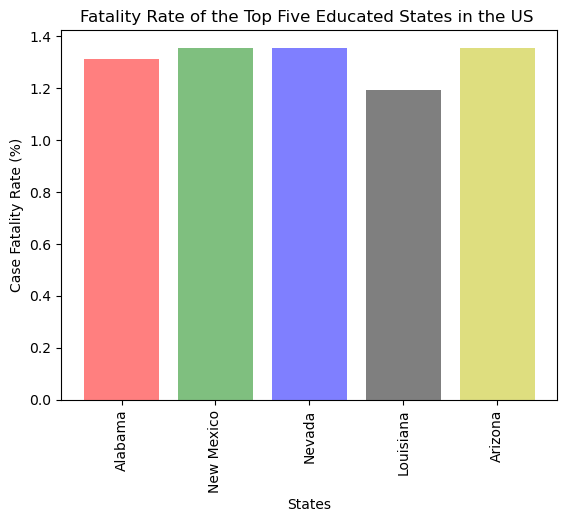

In [170]:
tick_locations = [value for value in x_axis]
plt.bar(x_axis,top_fatality_rate, color=b_colors, alpha=0.5, align="center",label=b_labels)

x= plt.xticks(tick_locations, top_five["state"],rotation="vertical" )

# Give our chart some labels and a tile
plt.title("Fatality Rate of the Top Five Educated States in the US ")
plt.xlabel("States")
plt.ylabel("Case Fatality Rate (%)")
plt.savefig("images/Fatality rate of the top five states.png")
plt.show()